In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

if __name__ == "__main__":
    df_train = pd.read_csv("kk_cut_traindev_w_token_header.csv", encoding="utf-8", sep=',')
    df_train = shuffle(df_train)

    train_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_train, df_train["label"], num_epochs=None, shuffle=True)

    df_test = pd.read_csv("kk_cut_test_w_token_header.csv", encoding="utf-8", sep=',')
    df_test = shuffle(df_test)

    predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_test, df_test["label"], shuffle=False)

    embedded_text_feature_column = hub.text_embedding_column(
        key="text", 
        module_spec="https://tfhub.dev/google/nnlm-ja-dim128/1")

    estimator = tf.estimator.DNNClassifier(
        hidden_units=[512, 128],
        feature_columns=[embedded_text_feature_column],
        n_classes=14,
        optimizer=tf.train.AdamOptimizer(learning_rate=0.003))

    estimator.train(input_fn=train_input_fn, steps=1000);
    test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
    print("Test set accuracy: {accuracy}".format(**test_eval_result))

INFO:tensorflow:Using default config.


I0617 23:00:02.581059 4455536064 estimator.py:1739] Using default config.


W0617 23:00:02.584475 4455536064 estimator.py:1760] Using temporary folder as model directory: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x125732e10>, '_model_dir': '/var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


I0617 23:00:02.587954 4455536064 estimator.py:201] Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x125732e10>, '_model_dir': '/var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


INFO:tensorflow:Calling model_fn.


I0617 23:00:02.632301 4455536064 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0617 23:00:02.660782 4455536064 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0617 23:00:02.705168 4455536064 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0617 23:00:02.987428 4455536064 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0617 23:00:02.990716 4455536064 basic_session_run_hooks.py:527] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0617 23:00:03.227874 4455536064 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0617 23:00:03.912642 4455536064 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0617 23:00:04.576018 4455536064 session_manager.py:493] Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0617 23:00:04.605665 4455536064 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py:809: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt.


I0617 23:00:04.963397 4455536064 basic_session_run_hooks.py:594] Saving checkpoints for 0 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt.


INFO:tensorflow:loss = 334.86636, step = 1


I0617 23:00:06.992094 4455536064 basic_session_run_hooks.py:249] loss = 334.86636, step = 1


INFO:tensorflow:global_step/sec: 213.964


I0617 23:00:07.458451 4455536064 basic_session_run_hooks.py:680] global_step/sec: 213.964


INFO:tensorflow:loss = 148.69829, step = 101 (0.470 sec)


I0617 23:00:07.462071 4455536064 basic_session_run_hooks.py:247] loss = 148.69829, step = 101 (0.470 sec)


INFO:tensorflow:global_step/sec: 262.473


I0617 23:00:07.839454 4455536064 basic_session_run_hooks.py:680] global_step/sec: 262.473


INFO:tensorflow:loss = 115.581955, step = 201 (0.381 sec)


I0617 23:00:07.842947 4455536064 basic_session_run_hooks.py:247] loss = 115.581955, step = 201 (0.381 sec)


INFO:tensorflow:global_step/sec: 260.335


I0617 23:00:08.223558 4455536064 basic_session_run_hooks.py:680] global_step/sec: 260.335


INFO:tensorflow:loss = 120.00308, step = 301 (0.384 sec)


I0617 23:00:08.227125 4455536064 basic_session_run_hooks.py:247] loss = 120.00308, step = 301 (0.384 sec)


INFO:tensorflow:global_step/sec: 260.704


I0617 23:00:08.607141 4455536064 basic_session_run_hooks.py:680] global_step/sec: 260.704


INFO:tensorflow:loss = 120.47025, step = 401 (0.384 sec)


I0617 23:00:08.610716 4455536064 basic_session_run_hooks.py:247] loss = 120.47025, step = 401 (0.384 sec)


INFO:tensorflow:global_step/sec: 264.652


I0617 23:00:08.985007 4455536064 basic_session_run_hooks.py:680] global_step/sec: 264.652


INFO:tensorflow:loss = 106.52246, step = 501 (0.378 sec)


I0617 23:00:08.988965 4455536064 basic_session_run_hooks.py:247] loss = 106.52246, step = 501 (0.378 sec)


INFO:tensorflow:global_step/sec: 267.984


I0617 23:00:09.358150 4455536064 basic_session_run_hooks.py:680] global_step/sec: 267.984


INFO:tensorflow:loss = 109.93385, step = 601 (0.373 sec)


I0617 23:00:09.362366 4455536064 basic_session_run_hooks.py:247] loss = 109.93385, step = 601 (0.373 sec)


INFO:tensorflow:global_step/sec: 269.387


I0617 23:00:09.729362 4455536064 basic_session_run_hooks.py:680] global_step/sec: 269.387


INFO:tensorflow:loss = 121.91249, step = 701 (0.371 sec)


I0617 23:00:09.733148 4455536064 basic_session_run_hooks.py:247] loss = 121.91249, step = 701 (0.371 sec)


INFO:tensorflow:global_step/sec: 262.985


I0617 23:00:10.109611 4455536064 basic_session_run_hooks.py:680] global_step/sec: 262.985


INFO:tensorflow:loss = 125.335815, step = 801 (0.380 sec)


I0617 23:00:10.113554 4455536064 basic_session_run_hooks.py:247] loss = 125.335815, step = 801 (0.380 sec)


INFO:tensorflow:global_step/sec: 277.485


I0617 23:00:10.469994 4455536064 basic_session_run_hooks.py:680] global_step/sec: 277.485


INFO:tensorflow:loss = 85.03331, step = 901 (0.361 sec)


I0617 23:00:10.474554 4455536064 basic_session_run_hooks.py:247] loss = 85.03331, step = 901 (0.361 sec)


INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt.


I0617 23:00:10.857902 4455536064 basic_session_run_hooks.py:594] Saving checkpoints for 1000 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt.


INFO:tensorflow:Loss for final step: 91.6343.


I0617 23:00:13.021825 4455536064 estimator.py:359] Loss for final step: 91.6343.


INFO:tensorflow:Calling model_fn.


I0617 23:00:13.047555 4455536064 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0617 23:00:13.073918 4455536064 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0617 23:00:13.112538 4455536064 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0617 23:00:13.285789 4455536064 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-06-17T14:00:13Z


I0617 23:00:13.307215 4455536064 evaluation.py:257] Starting evaluation at 2019-06-17T14:00:13Z


INFO:tensorflow:Graph was finalized.


I0617 23:00:13.406622 4455536064 monitored_session.py:222] Graph was finalized.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0617 23:00:13.409951 4455536064 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt-1000


I0617 23:00:13.415164 4455536064 saver.py:1270] Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


I0617 23:00:14.104341 4455536064 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0617 23:00:14.756220 4455536064 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-06-17-14:00:15


I0617 23:00:15.258209 4455536064 evaluation.py:277] Finished evaluation at 2019-06-17-14:00:15


INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76103175, average_loss = 0.7675059, global_step = 1000, loss = 97.3073


I0617 23:00:15.261934 4455536064 estimator.py:1979] Saving dict for global step 1000: accuracy = 0.76103175, average_loss = 0.7675059, global_step = 1000, loss = 97.3073


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt-1000


I0617 23:00:15.363485 4455536064 estimator.py:2039] Saving 'checkpoint_path' summary for global step 1000: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt-1000


Test set accuracy: 0.761031746864


INFO:tensorflow:Calling model_fn.


I0617 23:03:42.837811 4455536064 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0617 23:03:42.868556 4455536064 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0617 23:03:42.923051 4455536064 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0617 23:03:43.068176 4455536064 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Graph was finalized.


I0617 23:03:43.184360 4455536064 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt-1000


I0617 23:03:43.188194 4455536064 saver.py:1270] Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmpxfTK0a/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


I0617 23:03:43.867688 4455536064 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0617 23:03:44.427043 4455536064 session_manager.py:493] Done running local_init_op.


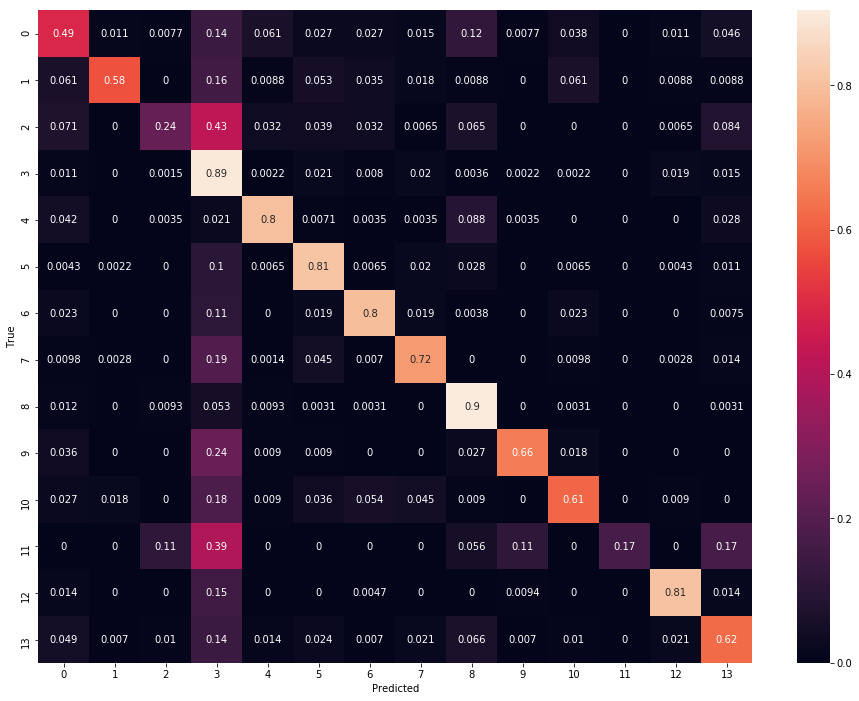

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = range(14)

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(df_test["label"], 
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16, 12))
sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

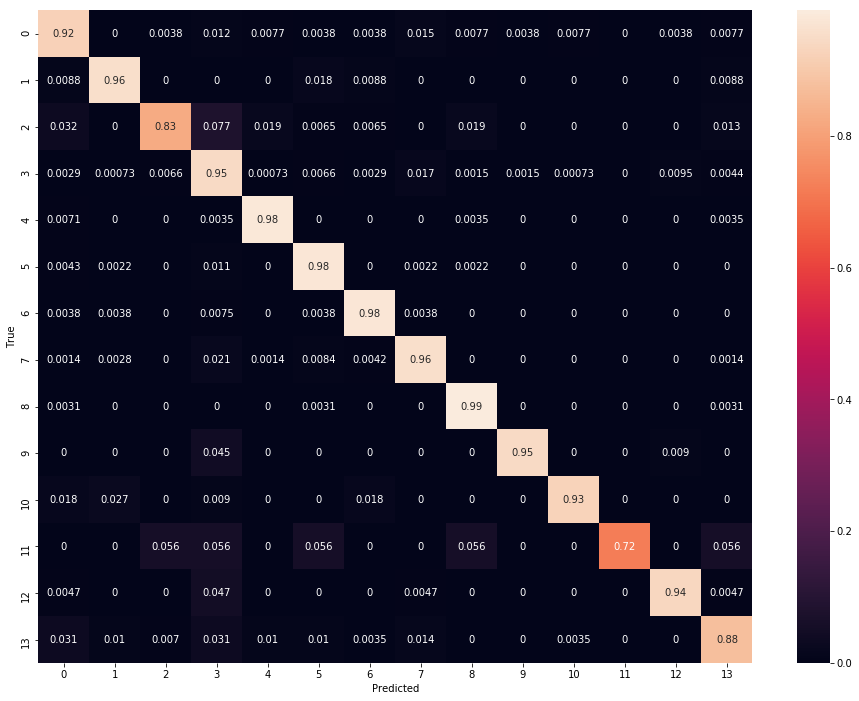

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

LABELS = range(14)

df_pred = pd.read_csv("kk_cut_prediction.csv", encoding="utf-8", sep=',')

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(df_pred["true_label"], df_pred["predict_label"])
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16, 12))
sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");